# Doccano JSONL to CSV Transformer
This notebook: 
- loads a Doccano-exported JSONL file of labeled segments `doccano_output_1klabeled_segments.jsonl`,
- flattens the metadata fields 
- filters only labeled rows 
- exports a clean CSV `1klabeled_segments.csv` with renamed and reordered columns.
- provides some visuals for insights into the class/label distribution

In [2]:
import json
import pandas as pd

# Path to your Doccano JSONL export
input_path = 'doccano_output_1klabeled_segments.jsonl'
# Output CSV path
output_path = '1klabeled_segments.csv'

In [3]:
# Load JSONL into list of dicts
data = []
with open(input_path, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
len(data)  # total segments, should be 7994

7994

In [4]:
# Filter only entries with a non-empty 'label' field
labeled = [d for d in data if d.get('label')]
len(labeled)  # should be 1000

1000

In [5]:
# Normalize nested 'meta' field into columns (flattening the nested structure)
flat_df = pd.json_normalize(labeled, sep='_')
flat_df.head()

,id,text,Comments,label,meta_datum,meta_links,meta_doc_id,meta_filter,meta_landtag,meta_beschreibung,meta_segment_id
0,8901,"24.11.2021 beimssiedlung 06:35 magdeburg, land...",[],[irrelevant],02.08.2023,[{'url': 'https://padoka.landtag.sachsen-anhal...,SA_100,[wittenberg],SA,"Aktuelle Daten im PhÃ¤nomenbereich ""Politisch ...",SA_100_8
1,10118,im vorfeld der parlamentarischen konferenz mit...,[],[irrelevant],16.11.2023,[{'url': 'https://www.parlamentsdokumentation....,BB_189,[leag],BB,,BB_189_3
2,10131,einladung: einladung 8/fin/52 ausschuss für fi...,[],[irrelevant],17.11.2023,[{'url': 'https://padoka.landtag.sachsen-anhal...,SA_232,"[wasserstoff, kraftwerke, wärmeplanung, witten...",SA,Ausschussprotokoll Ausschuss fÃ¼r Finanzen 8/F...,SA_232_1
3,9124,dokument: drucksache 8/3052 öffentlich antrag ...,[],[irrelevant],29.08.2023,[{'url': 'https://padoka.landtag.sachsen-anhal...,SA_140,[lauchstädt],SA,Gewaltschutz und Hilfssysteme im Sinne der Ist...,SA_140_1
4,11684,einladung: einladung 8/pet/39 öffentlich aussc...,[],[irrelevant],14.03.2024,[{'url': 'https://padoka.landtag.sachsen-anhal...,SA_372,[wittenberg],SA,Ausschussprotokoll Ausschuss fÃ¼r Petitionen 8...,SA_372_1


In [6]:
# Drop the Doccano-added 'id' and 'comments' column and rename fields
flat_df = flat_df.drop(columns=['id','Comments'])
flat_df = flat_df.rename(columns={
    'text':'SegmentText',
    'label':'Label',
    'meta_doc_id':'DocumentID',
    'meta_segment_id':'SegmentID',
    'meta_datum':'Date',
    'meta_beschreibung':'Description',
    'meta_landtag':'Parliament',
    'meta_links':'Links',
    'meta_filter':'Filter',
})
print(f"{flat_df.columns}")
flat_df.head()

Index(['SegmentText', 'Label', 'Date', 'Links', 'DocumentID', 'Filter',
       'Parliament', 'Description', 'SegmentID'],
      dtype='object')


,SegmentText,Label,Date,Links,DocumentID,Filter,Parliament,Description,SegmentID
0,"24.11.2021 beimssiedlung 06:35 magdeburg, land...",[irrelevant],02.08.2023,[{'url': 'https://padoka.landtag.sachsen-anhal...,SA_100,[wittenberg],SA,"Aktuelle Daten im PhÃ¤nomenbereich ""Politisch ...",SA_100_8
1,im vorfeld der parlamentarischen konferenz mit...,[irrelevant],16.11.2023,[{'url': 'https://www.parlamentsdokumentation....,BB_189,[leag],BB,,BB_189_3
2,einladung: einladung 8/fin/52 ausschuss für fi...,[irrelevant],17.11.2023,[{'url': 'https://padoka.landtag.sachsen-anhal...,SA_232,"[wasserstoff, kraftwerke, wärmeplanung, witten...",SA,Ausschussprotokoll Ausschuss fÃ¼r Finanzen 8/F...,SA_232_1
3,dokument: drucksache 8/3052 öffentlich antrag ...,[irrelevant],29.08.2023,[{'url': 'https://padoka.landtag.sachsen-anhal...,SA_140,[lauchstädt],SA,Gewaltschutz und Hilfssysteme im Sinne der Ist...,SA_140_1
4,einladung: einladung 8/pet/39 öffentlich aussc...,[irrelevant],14.03.2024,[{'url': 'https://padoka.landtag.sachsen-anhal...,SA_372,[wittenberg],SA,Ausschussprotokoll Ausschuss fÃ¼r Petitionen 8...,SA_372_1


In [7]:
# Reorder & export
cols = ['DocumentID','SegmentID','Date','Parliament','Description','Links','Filter','SegmentText','Label']
flat_df[cols].to_csv(output_path, index=False)
print(f'Exported to {output_path}')

Exported to 1klabeled_segments.csv


# Visuals for insights into class distribution

In [8]:
#import libraries and color/order setup for visuals and import data

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

#parliament order
order = ["Global", "BB", "SN", "TH", "SA", "MV"]

# Define color scheme for labels
label_colors = {
    "['relevant']": "#1f77b4",    # blue
    "['irrelevant']": "#7f7f7f"   # gray
}

# Parliament-specific colors for other visualizations
parliament_palette = {
    "Global": "black",
    "BB": "#1f77b4",
    "SN": "#ff7f0e",
    "TH": "#2ca02c",
    "SA": "#d62728",
    "MV": "#9467bd"
}

line_styles = {
    "Global": "-",
    "BB": "--",
    "SN": "-.",
    "TH": ":",
    "SA": (0, (3,1,1,1)),  # custom example
    "MV": (0, (5,5))
}

df = pd.read_csv('1klabeled_segments.csv')

In [10]:
# Calculate token lengths for each segment
df['SegmentTokenLength'] = df['SegmentText'].str.split().str.len()

# Print overall statistics for token lengths
print("Overall SegmentTokenLength stats:\n", df["SegmentTokenLength"].describe())

# Print statistics for token lengths grouped by parliament
print("\nBy Parliament:\n", df.groupby("Parliament")["SegmentTokenLength"].describe())


Overall SegmentTokenLength stats:
 count    1000.000000
mean      748.606000
std       321.375137
min        35.000000
25%       470.250000
50%      1000.000000
75%      1000.000000
max      1000.000000
Name: SegmentTokenLength, dtype: float64

By Parliament:
             count        mean         std    min    25%     50%     75%  \
Parliament                                                                
BB          216.0  823.444444  291.482030   39.0  708.5  1000.0  1000.0   
MV           85.0  798.400000  276.482549  148.0  640.0  1000.0  1000.0   
SA          268.0  810.268657  283.290647   43.0  614.0  1000.0  1000.0   
SN          275.0  606.458182  354.279088   35.0  236.0   659.0  1000.0   
TH          156.0  762.500000  307.392583   37.0  493.5  1000.0  1000.0   

               max  
Parliament          
BB          1000.0  
MV          1000.0  
SA          1000.0  
SN          1000.0  
TH          1000.0  


**1. Overall Label Distribution**

C:\Users\tdoro\AppData\Local\Temp\ipykernel_61588\1960423627.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index,
C:\Users\tdoro\AppData\Local\Temp\ipykernel_61588\1960423627.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percentages[i]


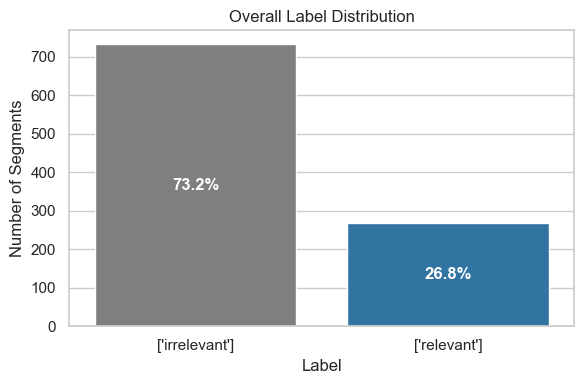

In [9]:
# Count of each label (e.g. "relevant" vs "irrelevant")
label_counts = df['Label'].explode().value_counts()
total = label_counts.sum()
percentages = (label_counts / total * 100).round(1)

plt.figure(figsize=(6,4))
# Create bar plot
ax = sns.barplot(x=label_counts.index,
                 y=label_counts.values, 
                 palette=[label_colors[x] for x in label_counts.index])

# Add percentage annotations in the middle of each bar
for i, v in enumerate(label_counts):
    percentage = percentages[i]
    ax.text(i, v/2, f'{percentage}%', 
            horizontalalignment='center',
            verticalalignment='center',
            color='white',
            fontweight='bold')

plt.title("Overall Label Distribution")
plt.ylabel("Number of Segments")
plt.xlabel("Label")
plt.tight_layout()
plt.show()

**2. Label Distribution by Parliament**

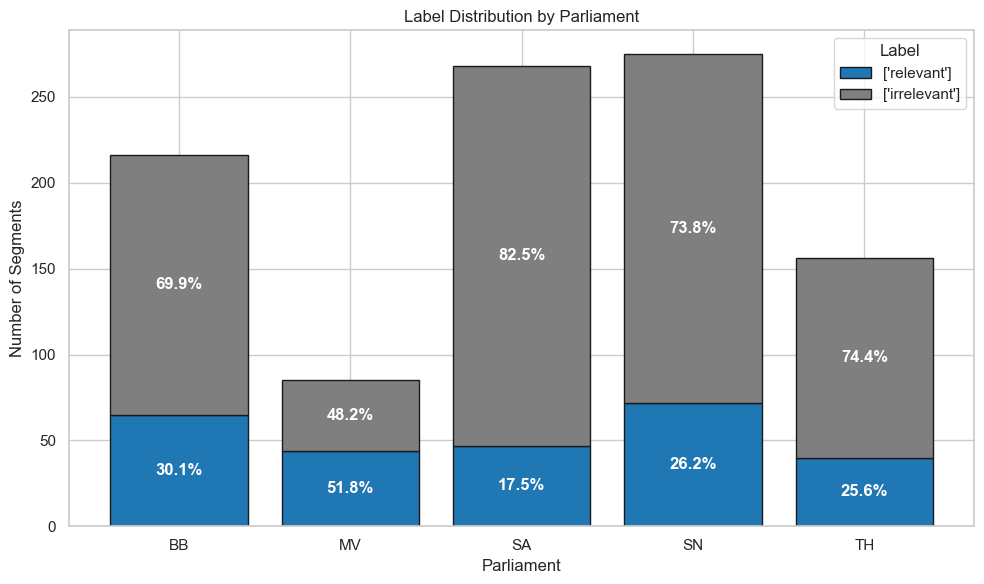

In [10]:
# Calculate counts per parliament and reshape data
pivot_data = df.groupby(['Parliament', 'Label']).size().unstack(fill_value=0)

# Calculate percentages
total_per_parliament = pivot_data.sum(axis=1)
percentage_data = (pivot_data.div(total_per_parliament, axis=0) * 100).round(1)

# Create figure
plt.figure(figsize=(10, 6))

# Plot stacked bars - relevant first (bottom)
bottom_bars = plt.bar(pivot_data.index, 
                     pivot_data["['relevant']"],
                     label="['relevant']",
                     color=label_colors["['relevant']"],
                     edgecolor='k')

# Then plot irrelevant on top
top_bars = plt.bar(pivot_data.index, 
                   pivot_data["['irrelevant']"],
                   bottom=pivot_data["['relevant']"],
                   label="['irrelevant']",
                   color=label_colors["['irrelevant']"],
                   edgecolor='k')

# Add percentage annotations in the middle of each segment
for idx, parliament in enumerate(pivot_data.index):
    # For relevant (bottom) segments
    height_relevant = pivot_data.loc[parliament, "['relevant']"]
    bottom_relevant = height_relevant/2
    percentage_relevant = percentage_data.loc[parliament, "['relevant']"]
    plt.text(idx, bottom_relevant, 
            f'{percentage_relevant:.1f}%',
            ha='center', va='center',
            color='white',
            fontweight='bold')
    
    # For irrelevant (top) segments
    height_irrelevant = pivot_data.loc[parliament, "['irrelevant']"]
    bottom_irrelevant = height_relevant + height_irrelevant/2
    percentage_irrelevant = percentage_data.loc[parliament, "['irrelevant']"]
    plt.text(idx, bottom_irrelevant, 
            f'{percentage_irrelevant:.1f}%',
            ha='center', va='center',
            color='white',
            fontweight='bold')

plt.title("Label Distribution by Parliament")
plt.ylabel("Number of Segments")
plt.xlabel("Parliament")
plt.legend(title="Label")

plt.tight_layout()
plt.show()

**3. Time series of labeled data**

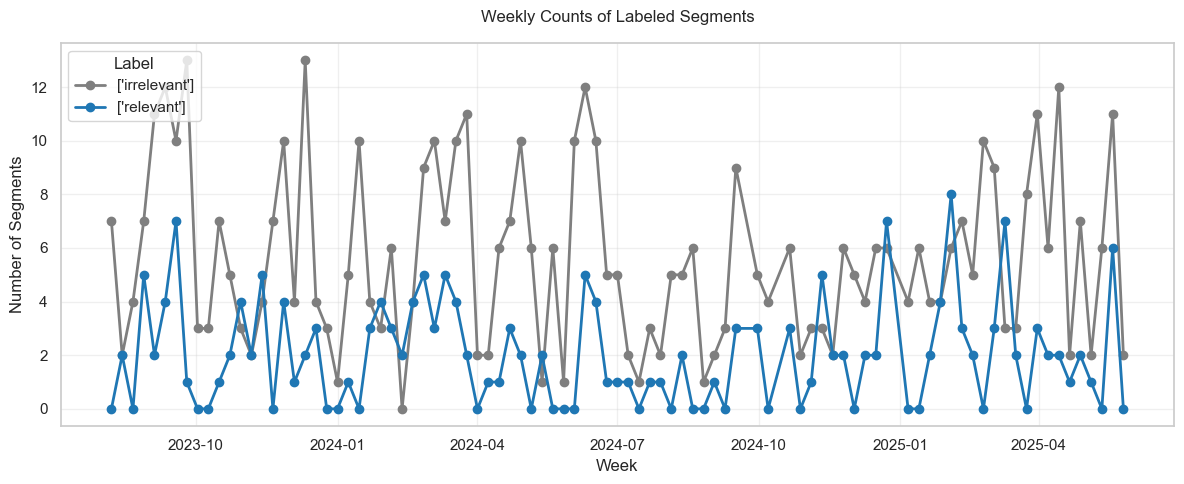

In [11]:
# Time series analysis of labeled segments
# 1) Ensure 'Date' is a datetime column
df['Date'] = pd.to_datetime(
    df['Date'], 
    dayfirst=True, 
    errors='coerce'
)

# 2) Count per week and label
# First group by date and label
grouped = df.groupby([
    pd.Grouper(key='Date', freq='W-MON'),
    'Label'
])

# Then count occurrences
counts = grouped.size()

# Finally reshape to wide format (dates as rows, labels as columns)
weekly = counts.unstack(fill_value=0)

# 3) Drop all weeks before cutoff
cutoff = pd.to_datetime("2023-08-01")
weekly = weekly.loc[weekly.index >= cutoff]

# 4) Plot
plt.figure(figsize=(12, 5))

# Create line plot for each label with our color scheme
for column in weekly.columns:
    plt.plot(
        weekly.index, 
        weekly[column],
        label=column,
        color=label_colors[column],
        marker='o',
        markersize=6,
        linewidth=2
    )

plt.title("Weekly Counts of Labeled Segments", pad=15)
plt.ylabel("Number of Segments")
plt.xlabel("Week")
plt.legend(title="Label", loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**4. Label 'Relevant' Ratio Trend Over Time**

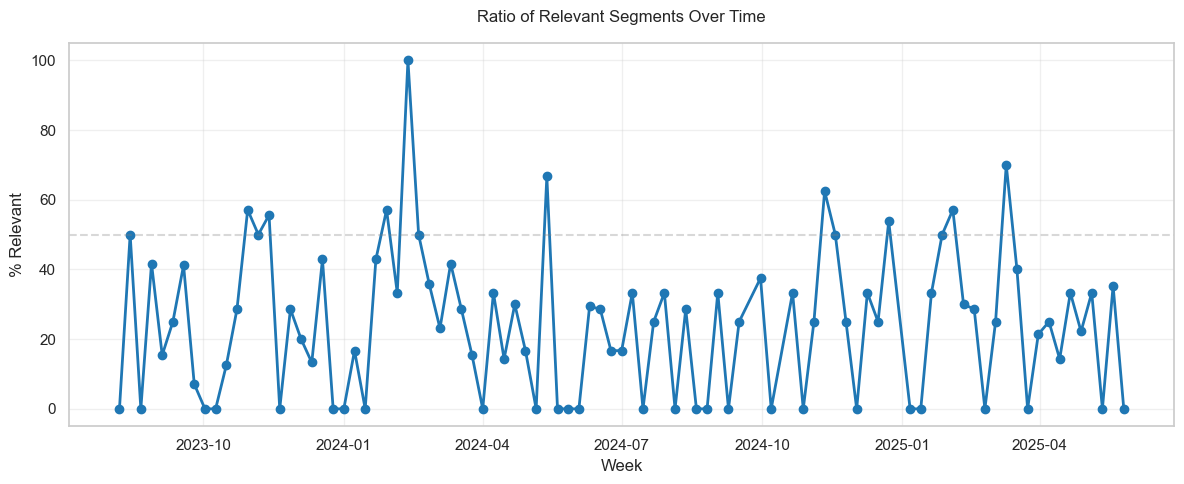

In [12]:
# Calculate ratio of relevant vs irrelevant over time
weekly_ratio = (
    weekly["['relevant']"] / 
    (weekly["['relevant']"] + weekly["['irrelevant']"]) * 100
).round(1)

plt.figure(figsize=(12, 5))

# Plot ratio line with consistent color scheme
plt.plot(weekly_ratio.index, weekly_ratio.values,
         color=label_colors["['relevant']"],  # Use consistent color for relevant
         linewidth=2, 
         marker='o',
         markersize=6)

plt.axhline(y=50, color='gray', linestyle='--', alpha=0.3)
plt.title("Ratio of Relevant Segments Over Time", pad=15)
plt.ylabel("% Relevant")
plt.xlabel("Week")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**5. Time Series by Parliament**

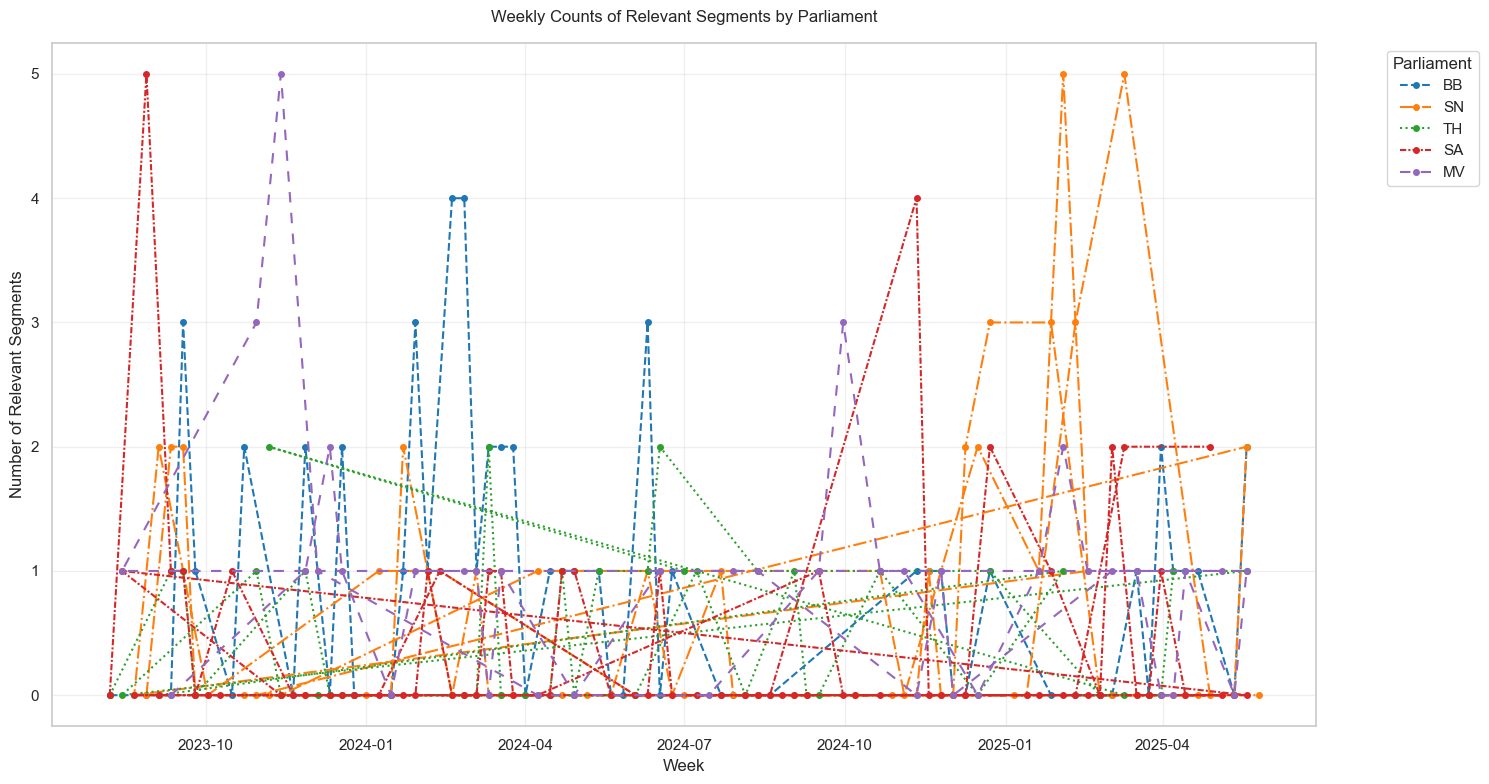

In [13]:
# Create weekly time series for each parliament
parliament_weekly = (
    df
    .groupby([
        'Parliament',
        pd.Grouper(key='Date', freq='W-MON'),
        'Label'
    ])
    .size()
    .unstack(fill_value=0)
)

# Plot time series for each parliament
plt.figure(figsize=(15, 8))

# Use predefined order for consistent visualization
for parl in order:
    if parl != "Global" and parl in parliament_weekly.index:  # Skip "Global" as it's not a real parliament
        parl_data = parliament_weekly.loc[parl]
        parl_data = parl_data.loc[parl_data.index >= cutoff]
        
        if not parl_data.empty:
            plt.plot(
                parl_data.index,
                parl_data["['relevant']"],
                label=parl,
                color=parliament_palette[parl],
                linestyle=line_styles[parl],
                marker='o',
                markersize=4
            )

plt.title("Weekly Counts of Relevant Segments by Parliament", pad=15)
plt.ylabel("Number of Relevant Segments")
plt.xlabel("Week")
plt.legend(title="Parliament", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()